In [2]:
exec (open("/Users/pvmarkov/dengue/scripts/functions.py").read ())
refgenome_file = "/Users/pvmarkov/dengue/data/pDVWSK601-NGC virus.gb"
#getting_cover_ntfreqs ("/Users/pvmarkov/dengue/data/merged_twoway_kass_rehead_sorted.bam", "/Users/pvmarkov/dengue/data/mergetwoway_kass_cover_majorb_seqqual>=60ON_alignqualOFF_pairsOFF.csv", True, False, False)

In [3]:
counts_dataframe = pd.read_csv ("/Users/pvmarkov/dengue/data/mergetwoway_kass_cover_majorb_seqqual>=60ON_alignqualOFF_pairsOFF.csv")

correction = - getting_position_correction (refgenome_file, ''.join(counts_dataframe ['majorsequence']))
#print (correction)


16138


In [4]:
print (counts_dataframe.describe ())

         Unnamed: 0             As             Cs             Gs     Ns  \
count  10716.000000   10716.000000   10716.000000   10716.000000  10716   
mean    5357.500000   33789.080067   21035.934397   24881.493561      0   
std     3093.587077   50054.087712   42700.605606   44160.795773      0   
min        0.000000       0.000000       0.000000       0.000000      0   
25%     2678.750000       5.000000       4.000000       3.000000      0   
50%     5357.500000      13.000000      11.000000      12.000000      0   
75%     8036.250000   89036.500000      52.000000   35987.750000      0   
max    10715.000000  173941.000000  169828.000000  170276.000000      0   

                  Ts       coverage  expected_number_of_errors  \
count   10716.000000   10716.000000               10716.000000   
mean    20792.861609  100499.369634                  91.032501   
std     41890.733829   24037.347840                  70.948019   
min         0.000000       1.000000                   0.0003

In [5]:
import sys
annotations = '/Users/pvmarkov/dengue/data/ref_geno_anottation_relabel.gff'

try:
    f= open (annotations, 'r')
except IOError:
    print ("Unknown file " + annotations)
    sys.exit()
    
line = ""
annots_list = list ()
line_list = list ()
for l in f:
    if ('CDS' in l or 'UTR' in l) and 'DEN2' not in l and 'Beta-lactamase' not in l:
        line_list = l.split()
        annots_list.append (make_annotation (line_list [12], line_list [3], line_list [4], correction))
#        print (l)
#        print (line_list)
annots_list.sort (key=lambda x: x.start)
print ('The annotations and their positions are: \n',annots_list)
#print (annots_list [0].name)
#print (annots_list [0].start)
            

f.close()

The annotations and their positions are: 
 [5UTR: 1 to 96, "Capsid": 97 to 438, "SP\prM": 397 to 438, "prM": 439 to 936, "M\(mature\form)": 712 to 936, E: 937 to 2421, "NS1": 2422 to 3477, "NS2A": 3478 to 4131, "NS2B": 4132 to 4521, "NS3": 4522 to 6375, "NS4A": 6376 to 6825, "NS4B": 6826 to 7569, "NS5": 7570 to 10272, 3UTR: 10273 to 10723]


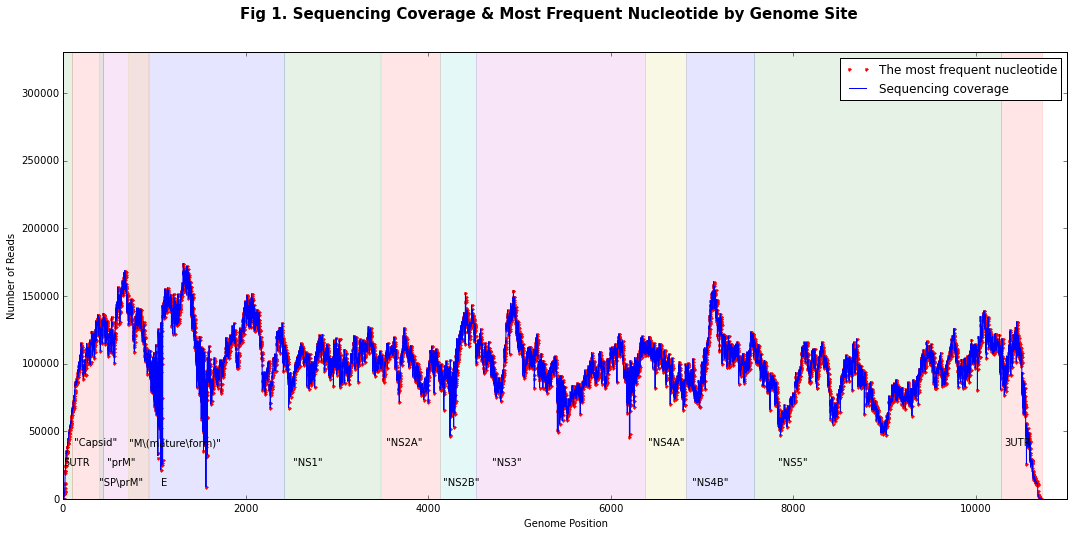

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Fig 1. Sequencing Coverage & Most Frequent Nucleotide by Genome Site', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], counts_dataframe ['majorbases'], 'r.') #(position, coverage, 'r-')
plt.plot (counts_dataframe ['position'], counts_dataframe ['coverage'], 'b-') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Number of Reads')
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
plt.legend (['The most frequent nucleotide', 'Sequencing coverage'], loc = 'upper right')
axis_lower_limit = 0
axis_upper_limit = 330000
plt.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

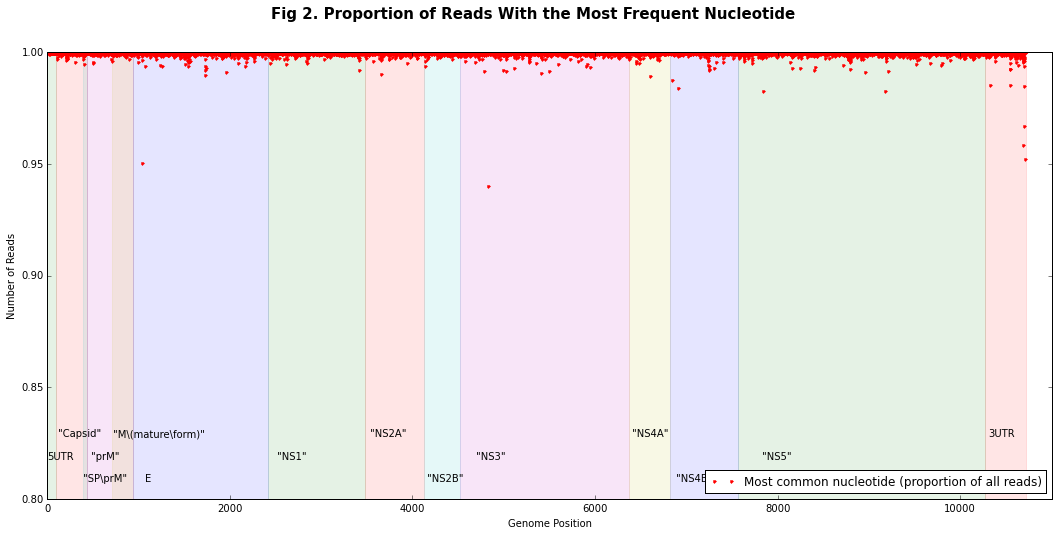

In [7]:
#majorbase_ratio = list ()
#coverage = counts_dataframe ['As'] + counts_dataframe ['Cs'] + counts_dataframe ['Gs'] + counts_dataframe ['Ts'] + counts_dataframe ['Ns']
#majorbases = counts_dataframe ['majorbases']
#for x in range (len(coverage)):
#    majorbase_ratio.append (majorbases [x]/coverage[x])
    
#def ratio(x,y):
#    return x/y

#majorbase_ratio = list(map(ratio, majorbases, coverage))

coverage = counts_dataframe ['coverage']
majorbase_ratio = counts_dataframe ['majorbase_ratio']

%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], majorbase_ratio, 'r.') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Number of Reads')
fig_size = rcParams["figure.figsize"]
plt.suptitle('Fig 2. Proportion of Reads With the Most Frequent Nucleotide', fontsize=15, fontweight='bold')
plt.legend (['Most common nucleotide (proportion of all reads)', 'coverage'], loc = 'lower right')
axis_lower_limit = 0.80
plt.axis ([0, 11000, axis_lower_limit, 1])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    color += 1/len(annots_list)

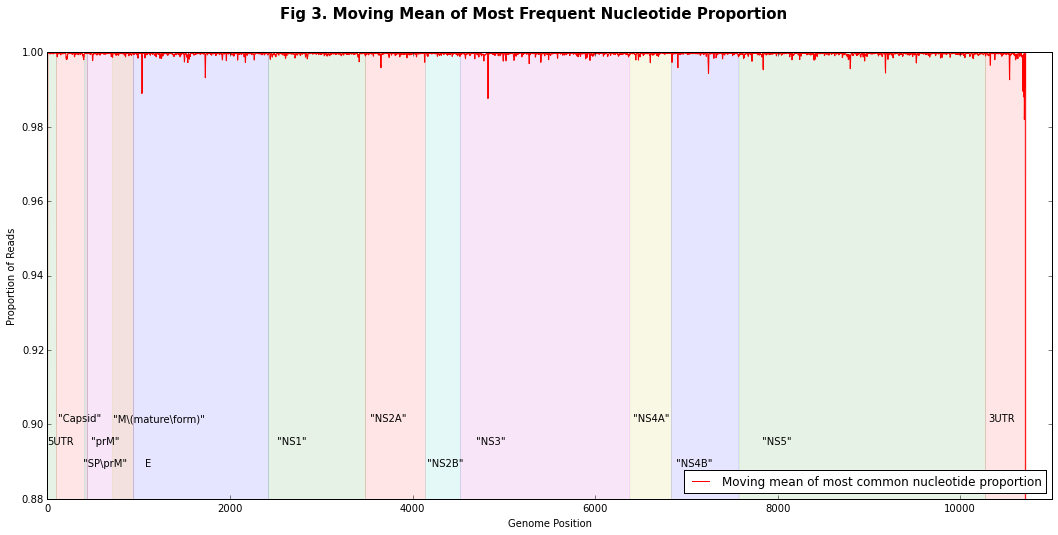

In [8]:
moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Fig 3. Moving Mean of Most Frequent Nucleotide Proportion', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Proportion of Reads')
axis_lower_limit = 0.88
plt.axis ([0, 11000, axis_lower_limit, 1])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    color += 1/len(annots_list)
#for gene in annots_list:
#    plt.hlines((color/10)+ 0.8, gene.start, gene.end, colors= (0+color, 1-color, 0.8, 1), linestyles='solid') #, label='NS5B')
#    plt.text( (gene.start + gene.end)/2, (color/10)+ 0.8, gene.name, rotation=0)
#    color += 1/len(annots_list)
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
plt.legend (['Moving mean of most common nucleotide proportion'], loc = 'lower right')
None

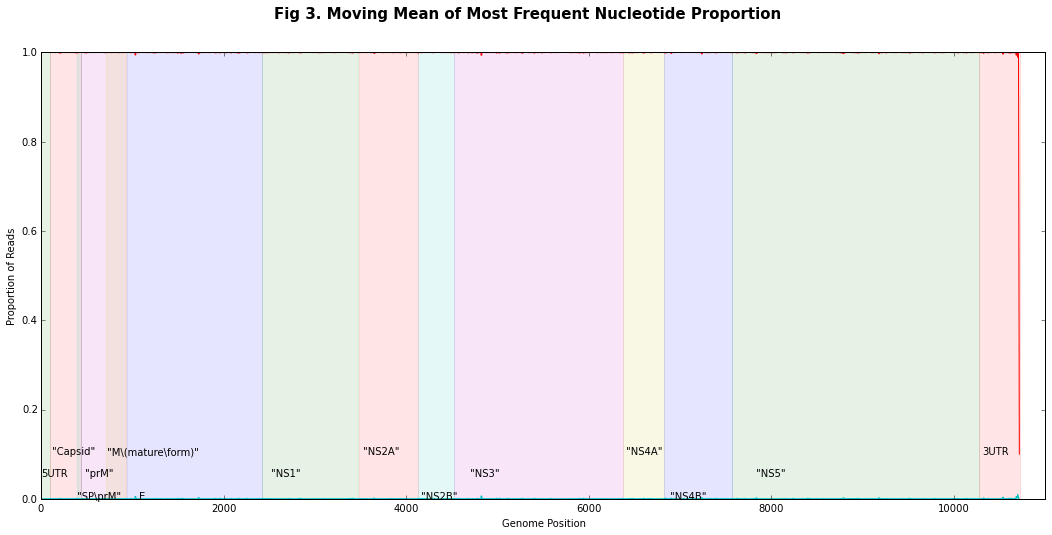

In [9]:
moving_average10 = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 10))
moving_average10_secondba = (runningMeanFast (counts_dataframe ['secondbase_ratio'], 10))
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.suptitle('Fig 3. Moving Mean of Most Frequent Nucleotide Proportion', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], moving_average10, 'r-') #(position, coverage, 'r-')
plt.plot (counts_dataframe ['position'], moving_average10_secondba, 'c-') #(position, coverage, 'r-')
plt.xlabel ('Genome Position')
plt.ylabel ('Proportion of Reads')
axis_lower_limit = 0#.88
plt.axis ([0, 11000, axis_lower_limit, 1])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    color += 1/len(annots_list)
#for gene in annots_list:
#    plt.hlines((color/10)+ 0.8, gene.start, gene.end, colors= (0+color, 1-color, 0.8, 1), linestyles='solid') #, label='NS5B')
#    plt.text( (gene.start + gene.end)/2, (color/10)+ 0.8, gene.name, rotation=0)
#    color += 1/len(annots_list)
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
#plt.legend (['Moving mean of most common nucleotide proportion'], loc = 'lower right')
None

AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

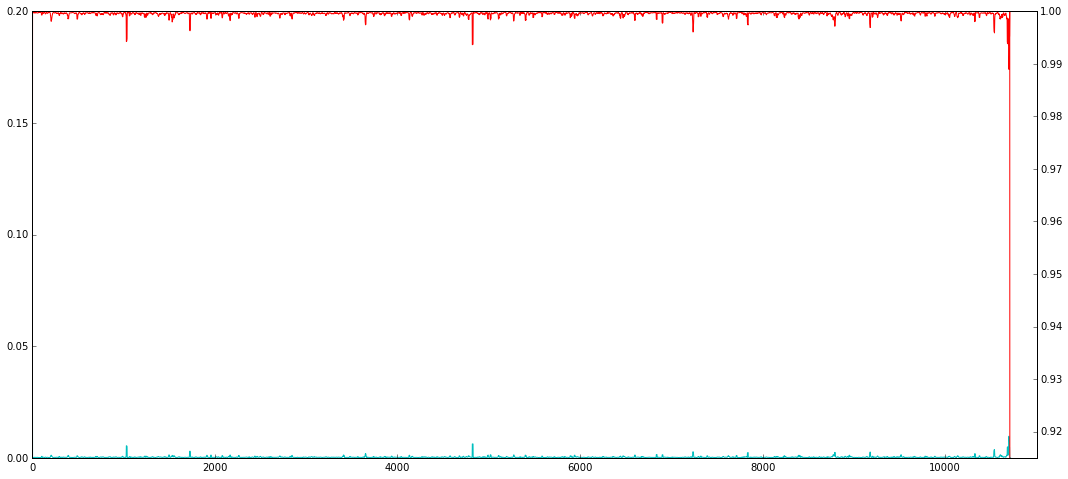

In [10]:
rcParams['figure.figsize'] = 18, 8
#plt.suptitle('Fig 1. Sequencing Coverage & Most Frequent Nucleotide by Genome Site', fontsize=15, fontweight='bold')
#plt.plot (counts_dataframe ['position'], counts_dataframe ['majorbases'], 'r.') #(position, coverage, 'r-')

#fig_w, fig_h = 33000, 500 # pixels
#dpi=100
#plt.figure(figsize=(float(fig_w)/float(dpi), float(fig_h)/float(dpi)), dpi=dpi, frameon=False)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot (counts_dataframe ['position'], moving_average10_secondba, 'c-') #(position, coverage, 'r-')
#ax1.xlabel ('Genome Position')
#ax1.ylabel ('Number of Reads')
#fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0
axis_upper_limit = 0.2
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot (counts_dataframe ['position'], moving_average10, 'r-') #(position, coverage, 'r-')

axis_lower_limit = 0.915
ax2.axis ([0, 11000, axis_lower_limit, 1])
ax2.ylabel ('Proportion of Reads')
ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

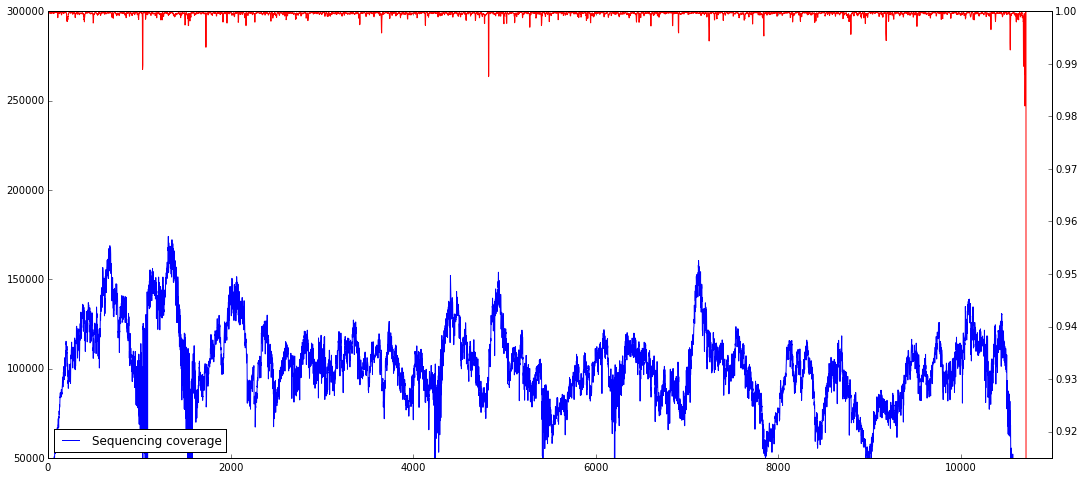

In [11]:
rcParams['figure.figsize'] = 18, 8
#plt.suptitle('Fig 1. Sequencing Coverage & Most Frequent Nucleotide by Genome Site', fontsize=15, fontweight='bold')
#plt.plot (counts_dataframe ['position'], counts_dataframe ['majorbases'], 'r.') #(position, coverage, 'r-')

#fig_w, fig_h = 33000, 500 # pixels
#dpi=100
#plt.figure(figsize=(float(fig_w)/float(dpi), float(fig_h)/float(dpi)), dpi=dpi, frameon=False)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot (counts_dataframe ['position'], counts_dataframe ['coverage'], 'b-') #(position, coverage, 'r-')
#ax1.xlabel ('Genome Position')
#ax1.ylabel ('Number of Reads')
#fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 50000
axis_upper_limit = 300000
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')

axis_lower_limit = 0.915
ax2.axis ([0, 11000, axis_lower_limit, 1])
ax2.ylabel ('Proportion of Reads')
ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


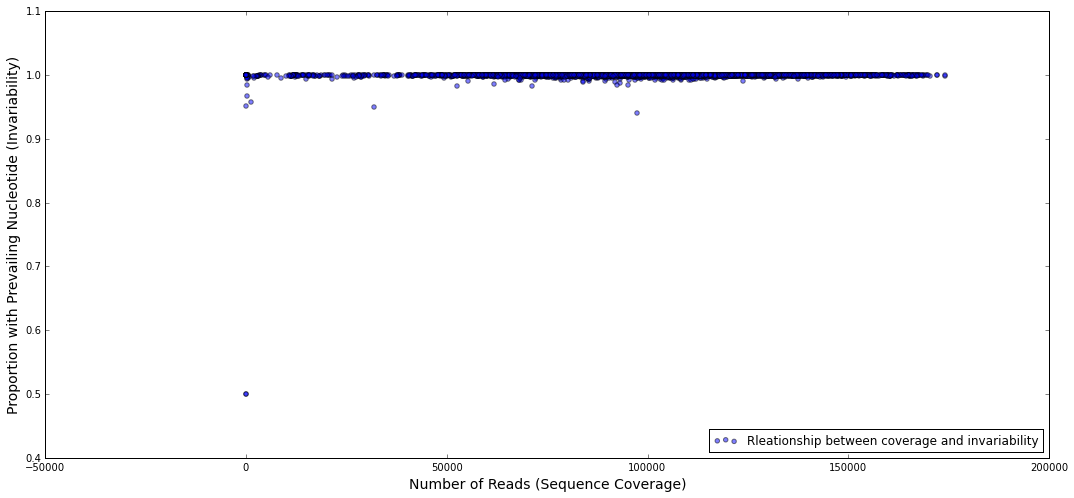

In [12]:
N = 50


#highcover_dataframe = counts_dataframe [counts_dataframe['coverage'] > 100000]

x = counts_dataframe ['coverage']
y = counts_dataframe ['majorbase_ratio']
#colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses




plt.scatter(x, y, alpha=0.5)
plt.xlabel ('Number of Reads (Sequence Coverage)', fontsize=14)
plt.ylabel ('Proportion with Prevailing Nucleotide (Invariability)', fontsize=14)
plt.legend (['Rleationship between coverage and invariability'], loc = 'lower right')
#fit = np.polyfit(x,y,1)
#fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

#plt.plot(x, fit_fn(x), '-r')
#plt.show()

/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


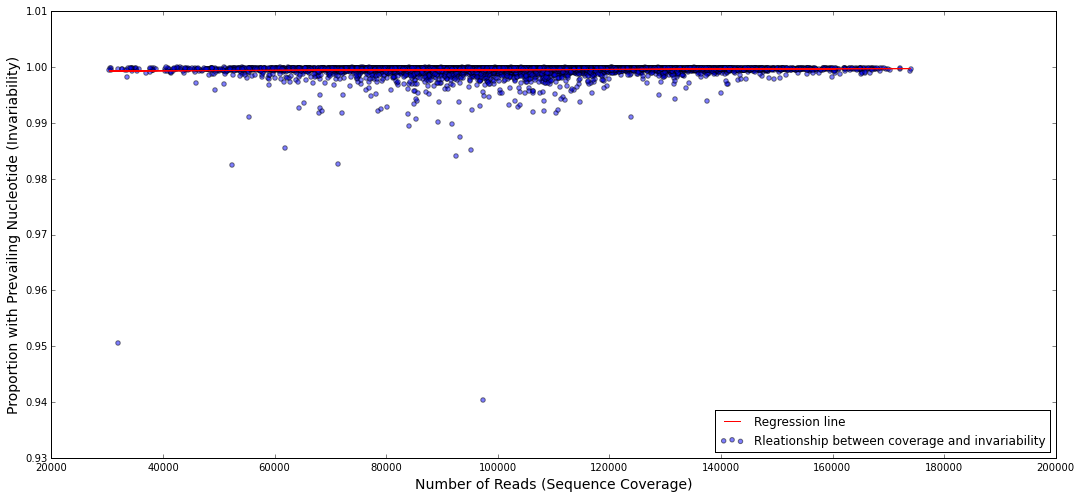

The slope is: 2.77564879936e-09, The intercept is: 0.999263443618


(0.057690662024521173, 3.0015193045284217e-09)

In [13]:
import scipy.stats
import statistics

N = 50

highcover_dataframe = counts_dataframe [counts_dataframe['coverage'] > 30000]

x = highcover_dataframe ['coverage']
y = highcover_dataframe ['majorbase_ratio']
#colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses
plt.xlabel ('Number of Reads (Sequence Coverage)', fontsize=14)
plt.ylabel ('Proportion with Prevailing Nucleotide (Invariability)', fontsize=14)



plt.scatter(x, y, alpha=0.5)


fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x, fit_fn(x), '-r')
plt.legend (['Regression line', 'Rleationship between coverage and invariability'], loc = 'lower right')
plt.show()

beta, a = np.polyfit(x, y, 1)
print ('The slope is: ' + str (beta) + ', The intercept is: ' + str (a))

scipy.stats.pearsonr(x, y)


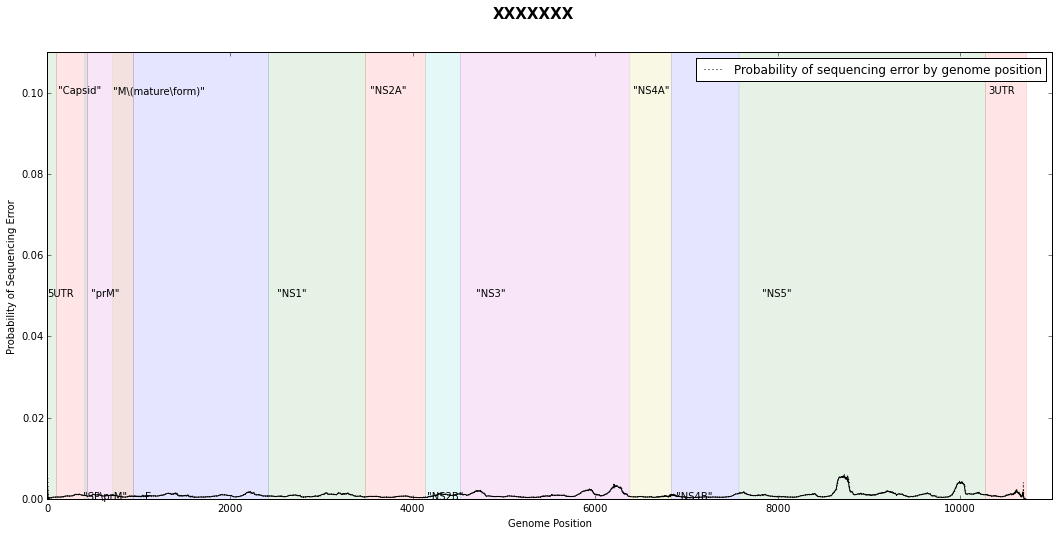

In [14]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
moving_average10_proberror = (runningMeanFast (counts_dataframe ['probability_of_seq_error'], 10))
plt.suptitle('XXXXXXX', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], counts_dataframe ['probability_of_seq_error'], 'k:')
plt.plot (counts_dataframe ['position'], moving_average10_proberror, 'k-')
plt.xlabel ('Genome Position')
plt.ylabel ('Probability of Sequencing Error')
axis_lower_limit = 0#.88
plt.axis ([0, 11000, axis_lower_limit, 0.11])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    color += 1/len(annots_list)
#for gene in annots_list:
#    plt.hlines((color/10)+ 0.8, gene.start, gene.end, colors= (0+color, 1-color, 0.8, 1), linestyles='solid') #, label='NS5B')
#    plt.text( (gene.start + gene.end)/2, (color/10)+ 0.8, gene.name, rotation=0)
#    color += 1/len(annots_list)
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
plt.legend (['Probability of sequencing error by genome position'], loc = 'upper right')
None

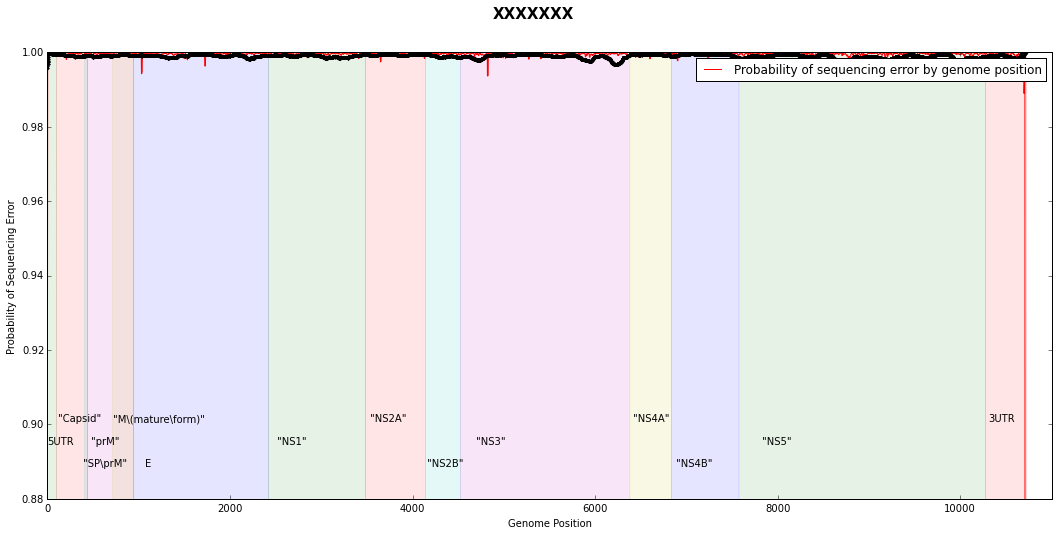

In [15]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
moving_average10_proberror = (runningMeanFast (counts_dataframe ['probability_of_seq_error'], 10))
plt.suptitle('XXXXXXX', fontsize=15, fontweight='bold')
plt.plot (counts_dataframe ['position'], moving_average10, 'r-') #(position, coverage, 'r-')
#plt.plot (counts_dataframe ['position'], counts_dataframe ['probability_of_seq_error'], 'k:')
plt.plot (counts_dataframe ['position'], 1-moving_average10_proberror, 'k.')
plt.xlabel ('Genome Position')
plt.ylabel ('Probability of Sequencing Error')
axis_lower_limit = 0.88
plt.axis ([0, 11000, axis_lower_limit, 1])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    color += 1/len(annots_list)
#for gene in annots_list:
#    plt.hlines((color/10)+ 0.8, gene.start, gene.end, colors= (0+color, 1-color, 0.8, 1), linestyles='solid') #, label='NS5B')
#    plt.text( (gene.start + gene.end)/2, (color/10)+ 0.8, gene.name, rotation=0)
#    color += 1/len(annots_list)
fig_size = rcParams["figure.figsize"]
#print ("Current figure size:", fig_size)
plt.legend (['Probability of sequencing error by genome position'], loc = 'upper right')
None

In [16]:

list1, list2, list3 = determin_codon_posit(annots_list[1], counts_dataframe ['majorsequence'])

print (list1)

['t', 'a', 'a', 'a', 'g', 'a', 'a', 'c', 'g', 'a', 'c', 'c', 't', 'a', 't', 't', 'a', 'g', 'a', 'g', 'a', 'g', 't', 'c', 'c', 't', 'a', 'a', 't', 'c', 'a', 'g', 't', 'c', 't', 'g', 't', 't', 'a', 'g', 'g', 'g', 'c', 't', 'a', 't', 't', 't', 'c', 't', 't', 'c', 't', 't', 'g', 't', 't', 'c', 't', 'c', 'c', 'c', 'c', 'g', 't', 't', 'a', 'g', 'g', 'g', 'c', 't', 'a', 'a', 'c', 'a', 'c', 't', 'a', 't', 't', 'g', 'g', 't', 'g', 'a', 'a', 't', 'g', 'g', 't', 't', 'a', 't', 't', 'a', 'g', 'g', 'g', 'g', 'c', 'c', 'g', 't', 't', 't', 't', 't', 't', 'c', 'c', 't', 't', 'c']


"Capsid": 97 to 438
0.00200958168561 -0.0355802304444
WilcoxonResult(statistic=2970.0, pvalue=0.4729771089532816)
WilcoxonResult(statistic=2580.0, pvalue=0.06651563758932158)
"SP\prM": 397 to 438
-0.00612359648455 0.0466566991056
WilcoxonResult(statistic=45.0, pvalue=0.97212532973166499)
WilcoxonResult(statistic=43.0, pvalue=0.86130425698830515)
"prM": 439 to 936
-0.00840604862296 -0.0679963718262
WilcoxonResult(statistic=6737.0, pvalue=0.85731991975208655)
WilcoxonResult(statistic=5412.0, pvalue=0.019512003741087733)
"M\(mature\form)": 712 to 936
-0.0152134303277 -0.100833677802
WilcoxonResult(statistic=1359.0, pvalue=0.877975426453107)
WilcoxonResult(statistic=1112.0, pvalue=0.13776024667703876)
E: 937 to 2421
-0.000120519021318 -0.0693407532114
WilcoxonResult(statistic=59201.0, pvalue=0.54287863706608896)
WilcoxonResult(statistic=46530.0, pvalue=4.222593271513201e-06)
"NS1": 2422 to 3477
0.004878139234 -0.0456713841097
WilcoxonResult(statistic=29729.0, pvalue=0.54236714173940026)
Wi

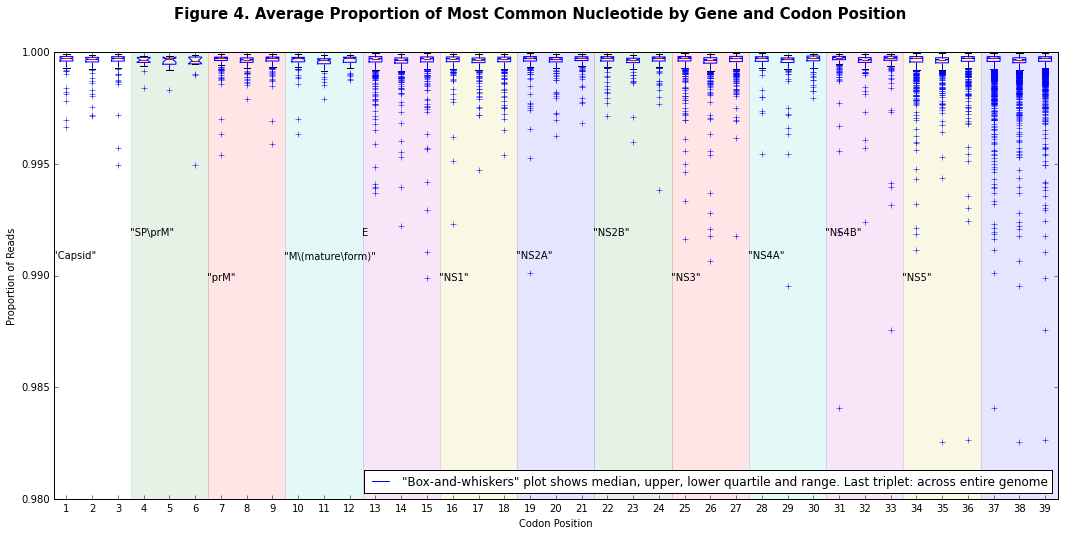

In [17]:
geneslist = list() 
#print (len(majorbase_ratio))
#list1, list2, list3 = determin_codon_posit(x, majorbase_ratio)
global_list1 = list()
global_list2 = list()
global_list3 = list()
for x in annots_list:
    if x.start>0 and x.end< len(majorbase_ratio) and 'UTR' not in x.name:
        list1, list2, list3 = determin_codon_posit(x, majorbase_ratio) # provides three lists of majorbase_ratio values for positions 1, 2 and 3 over the length of segment x
        geneslist.append (list1) # these three commands create list of lists... 
        geneslist.append (list2) # ...created by appending list of values for codon position1, then 2, then 3 for each gene in turn...
        geneslist.append (list3) # ...as the loop goes through members of annots_list
        list1_pruned = list1[0:-1] 
        list2_pruned = list2[0:-1]
        global_list1.extend(list1_pruned) # these three create a list of values for...
        global_list2.extend(list2_pruned) # ... codon positions 1, 2 and 3 throughout...
        global_list3.extend(list3)        # ... the entire genome.
        print (x)
        print ((statistics.median(list1_pruned) - statistics.median (list3))*1000, (statistics.median (list2_pruned) - statistics.median (list3))*1000)
        print (scipy.stats.wilcoxon (list1_pruned, list3)) # Wilcoxon signed rank test on position 1 vs. position 3...
        print (scipy.stats.wilcoxon (list2_pruned, list3)) # ...and pos2 vs. pos3 gene by gene

%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.xlabel ('Codon Position')
plt.ylabel ('Proportion of Reads')
#plt.axis ([0, 11000, 0.8, 1])
print ("Across the genome")
print ((statistics.median(global_list1) - statistics.median (global_list3))*1000, (statistics.median (global_list2) - statistics.median (global_list3))*1000)
print (scipy.stats.wilcoxon (global_list1, global_list3)) # Wilcoxon signed rank test on position 1 vs. position 3...
print (scipy.stats.wilcoxon (global_list2, global_list3)) # ...and pos2 vs. pos3 over entire genome
print ('')
print ('')
geneslist.append (global_list1) # adds the list of all-genome lists in positions 1, 2 and 3 to...
geneslist.append (global_list2) # ...the list of lists 'genelist', used to do the...
geneslist.append (global_list3) # ... boxplot below
plt.suptitle('Figure 4. Average Proportion of Most Common Nucleotide by Gene and Codon Position', fontsize=15, fontweight='bold')
axis_lower_limit = 0.98
plt.axis ([0, 39, axis_lower_limit, 1])
plt.boxplot(geneslist, 1)
plt.legend (['"Box-and-whiskers" plot shows median, upper, lower quartile and range. Last triplet: across entire genome'], loc = 'lower right')
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    if 'UTR' not in gene.name:
        #print (annots_list.index(gene))
        color_counter +=1
        plt.axvspan((annots_list.index(gene))*3 + 0.5, (annots_list.index(gene) + 1)*3 + 0.5, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
        plt.text ((annots_list.index(gene) - 1)*3 + 0.5, axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
        color += 1/len(annots_list)
None # this removes lots of unwanted output that matplotlib throws out.